# Exploratory Data Analysis

#### We are working with the data with null values in TVL, close price and market cap because we want to see since when there's registration and how it has evolved from 24-09-2023 to 21-09-2024

## Libraries

In [60]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict

## Loading data

In [61]:
# Function to load JSON
def loadJSON(filepath):
    with open(filepath) as file:
        return json.load(file)

In [62]:
# Loading the dataframe from json
df = pd.DataFrame(loadJSON('../../data/json/tokens-final-null.json'))
print(df.shape)

df.head()

(76804, 8)


Date Token     Name           TVL    Market cap     Price   
0  24-09-2023   BTC  Bitcoin  1.610619e+08  5.179683e+11  26261.44  \
1  25-09-2023   BTC  Bitcoin  1.546845e+08  5.117877e+11  26297.93   
2  26-09-2023   BTC  Bitcoin  1.536478e+08  5.121034e+11  26212.59   
3  27-09-2023   BTC  Bitcoin  1.481046e+08  5.110543e+11  26360.20   
4  28-09-2023   BTC  Bitcoin  1.478454e+08  5.137136e+11  27027.20   

   Correlation  Class  
0            0      4  
1            0      4  
2            0      4  
3            0      4  
4            0      4

In [63]:
# Basic stats
df.describe()

TVL    Market cap         Price   Correlation         Class
count  6.980100e+04  7.384500e+04  76572.000000  76804.000000  76804.000000
mean   3.482372e+08  8.081551e+09    459.520222      0.253489      3.663507
std    3.355516e+09  7.931307e+10   4682.575516      0.435011      0.976287
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000
25%    4.402655e+05  8.143869e+06      0.003475      0.000000      4.000000
50%    3.321153e+06  7.757557e+07      0.103000      0.000000      4.000000
75%    2.830407e+07  6.270852e+08      0.843000      1.000000      4.000000
max    6.797230e+10  1.436631e+12  73118.090000      1.000000      4.000000

## Basic graphs to understand the data

### Tokens with the highest average market cap

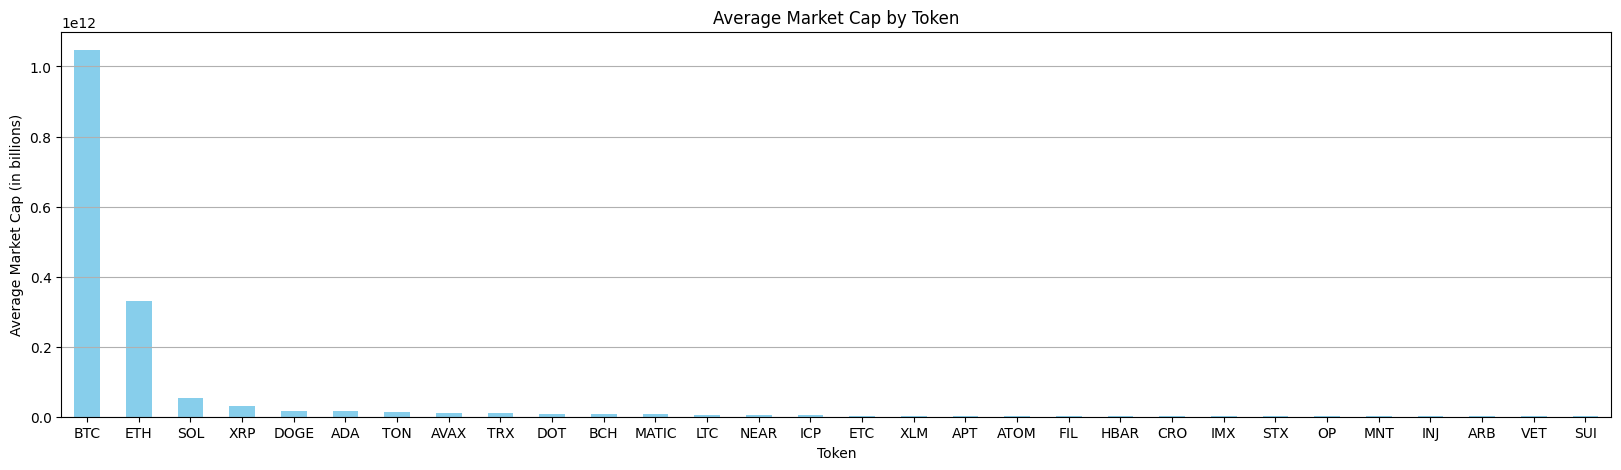

In [64]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_desc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_desc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap (in billions)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

## Tokens with the lowest average market cap

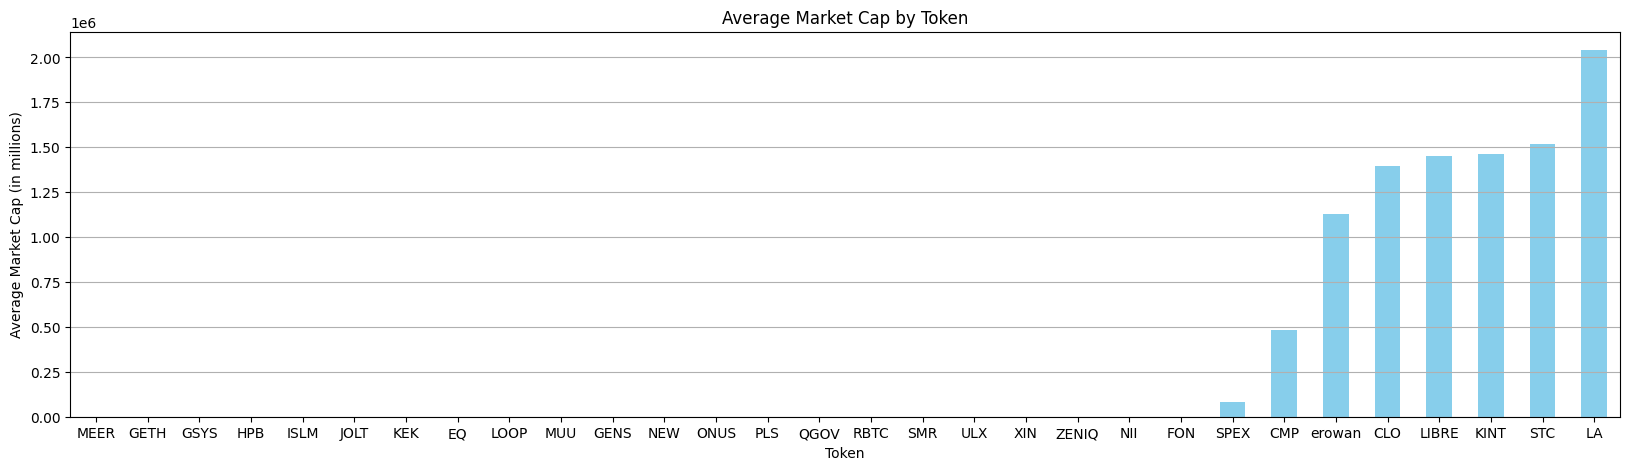

In [65]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_asc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap (in millions)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

#### We can see that there are some tokens with average market cap in zero, we can get rid of them :)

In [66]:
# Calculate the average market cap for each token
average_market_cap = df.groupby('Token')['Market cap'].mean().reset_index()

# Identify tokens with an average market cap of 0
tokens_with_zero_market_cap = average_market_cap[average_market_cap['Market cap'] == 0]['Token']

# Filter out rows corresponding to those tokens
df = df[~df['Token'].isin(tokens_with_zero_market_cap)]

# Display the filtered DataFrame
print(df.shape)
df.head()

(68796, 8)


Date Token     Name           TVL    Market cap     Price   
0  24-09-2023   BTC  Bitcoin  1.610619e+08  5.179683e+11  26261.44  \
1  25-09-2023   BTC  Bitcoin  1.546845e+08  5.117877e+11  26297.93   
2  26-09-2023   BTC  Bitcoin  1.536478e+08  5.121034e+11  26212.59   
3  27-09-2023   BTC  Bitcoin  1.481046e+08  5.110543e+11  26360.20   
4  28-09-2023   BTC  Bitcoin  1.478454e+08  5.137136e+11  27027.20   

   Correlation  Class  
0            0      4  
1            0      4  
2            0      4  
3            0      4  
4            0      4

#### We can display again!

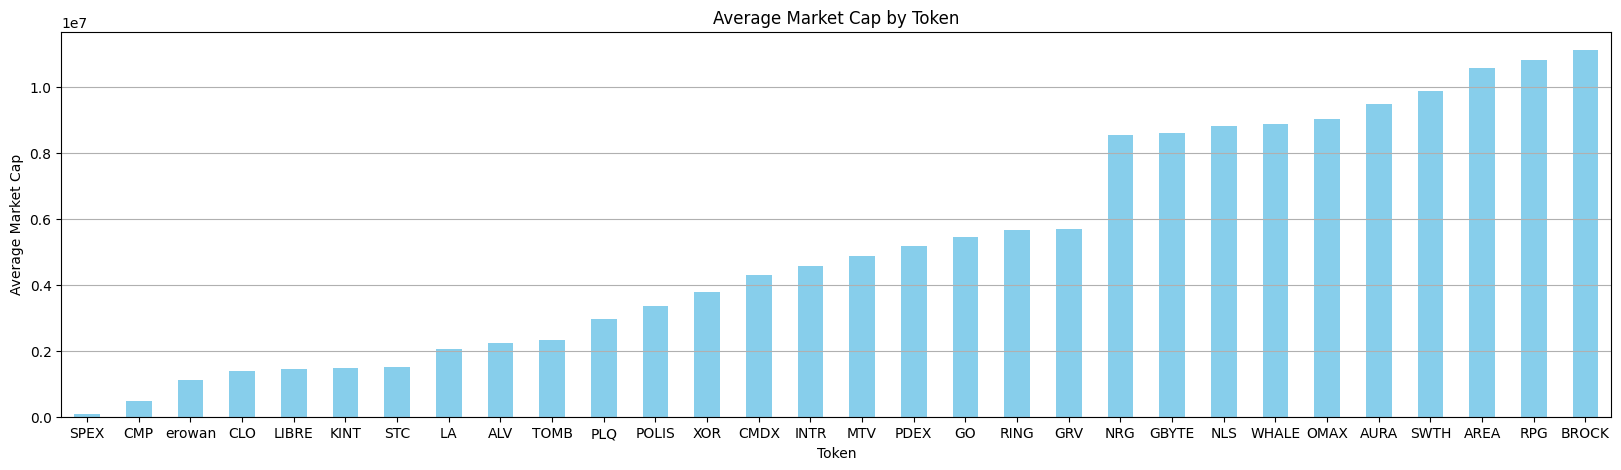

In [67]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_asc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

#### We can identify SPEX as the token with the lowest average market cap, but we can identify some other tokens that have a low value...

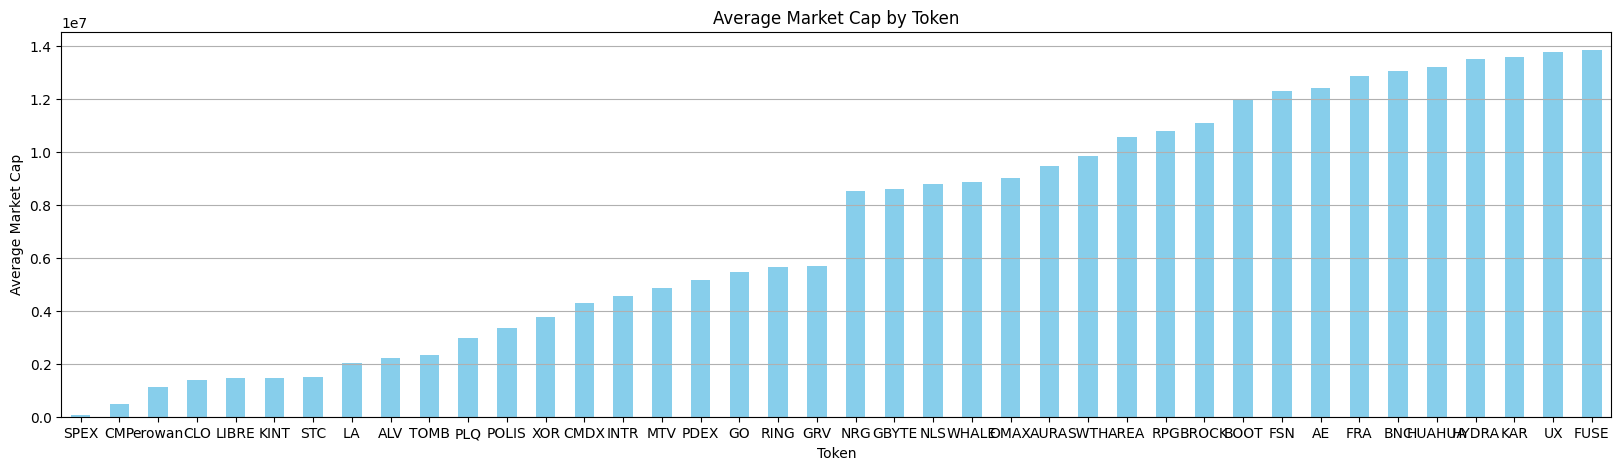

In [68]:
# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:40].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

### We can get which of these coins 

In [69]:
# Calcular el promedio histórico del market cap por token
average_market_cap = df.groupby('Token')['Market cap'].mean().reset_index()

# Calcular el cuartil 25% del market cap promedio
cuartil_25_market_cap = average_market_cap['Market cap'].quantile(0.25)

# Filtrar criptomonedas cuyo promedio del market cap está por debajo del cuartil 25%
low_market_cap_tokens = average_market_cap[average_market_cap['Market cap'] < cuartil_25_market_cap]['Token']

# Filtrar el DataFrame original para mantener solo los tokens filtrados
filtered_df = df[df['Token'].isin(low_market_cap_tokens)]

## Box Plot

In [70]:
import plotly.express as px

# Crear un gráfico de caja para Price
fig = px.box(filtered_df, x='Token', y='Price', title="Distribution of Prices (Average Market Cap < Q25)")
fig.show()

# Crear un gráfico de caja para TVL
fig = px.box(filtered_df, x='Token', y='TVL', title="Distribution of TVL (Average Market Cap < Q25)")
fig.show()

# Crear un gráfico de caja para Market Cap
fig = px.box(filtered_df, x='Token', y='Market cap', title="Distribution of Market Cap (Average Market Cap < Q25)")
fig.show()


## Stacked Bar Plot

In [71]:
# Agrupar por Token y sumar las métricas
grouped_data = filtered_df.groupby('Token').agg({'TVL': 'sum', 'Market cap': 'sum', 'Price': 'sum'}).reset_index()

# Crear gráfico de barras apiladas para TVL y Market Cap
fig = px.bar(grouped_data, x='Token', y=['TVL', 'Market cap'], title="Stacked Bar Plot: TVL and Market Cap per Token (Average Market Cap < Q25)")
fig.show()

## Heatmap

In [72]:
# Crear una tabla pivot para la correlación de precios entre tokens
price_pivot = filtered_df.pivot_table(index='Date', columns='Token', values='Price')

# Calcular la matriz de correlación
price_corr = price_pivot.corr()

# Crear un heatmap
fig = px.imshow(price_corr, title="Price Correlation between Tokens (Average Market Cap < Q25)")
fig.show()


## Scatter Matrix/Pair Plot

In [73]:
# Seleccionar columnas relevantes para el análisis
subset = filtered_df[['Price', 'Market cap', 'TVL']]

# Crear scatter matrix
fig = px.scatter_matrix(subset, title="Scatter Matrix of Price, Market Cap, and TVL (Average Market Cap < Q25)")
fig.show()

## Line Plot by Category

In [74]:
# Agrupar por fecha y calcular el promedio de las métricas
average_data = filtered_df.groupby('Date').agg({'Price': 'mean', 'TVL': 'mean', 'Market cap': 'mean'}).reset_index()

# Gráfico de líneas para el precio promedio
fig = go.Figure()
fig.add_trace(go.Scatter(x=average_data['Date'], y=average_data['Price'], mode='lines', name='Average Price'))
fig.update_layout(title="Average Price Over Time (Average Market Cap < Q25)", xaxis_title="Date", yaxis_title="Price (USD)")
fig.show()

# Gráfico de líneas para TVL promedio
fig = go.Figure()
fig.add_trace(go.Scatter(x=average_data['Date'], y=average_data['TVL'], mode='lines', name='Average TVL'))
fig.update_layout(title="Average TVL Over Time (Average Market Cap < Q25)", xaxis_title="Date", yaxis_title="TVL (USD)")
fig.show()

# Gráfico de líneas para Market Cap promedio
fig = go.Figure()
fig.add_trace(go.Scatter(x=average_data['Date'], y=average_data['Market cap'], mode='lines', name='Average Market Cap'))
fig.update_layout(title="Average Market Cap Over Time (Average Market Cap < Q25)", xaxis_title="Date", yaxis_title="Market Cap (USD)")
fig.show()


## Histogram Plot

In [75]:
# Crear un histograma de la distribución de precios
fig = px.histogram(filtered_df, x='Price', title="Histogram of Token Prices (Average Market Cap < Q25)", nbins=50)
fig.show()

# Crear un histograma de la distribución de Market Cap
fig = px.histogram(filtered_df, x='Market cap', title="Histogram of Market Cap (Average Market Cap < Q25)", nbins=50)
fig.show()

# Crear un histograma de la distribución de TVL
fig = px.histogram(filtered_df, x='TVL', title="Histogram of TVL (Average Market Cap < Q25)", nbins=50)
fig.show()

## Violin Plot

In [76]:
# Crear violin plot para el precio
fig = px.violin(filtered_df, x='Token', y='Price', title="Violin Plot of Prices across Tokens (Average Market Cap < Q25)")
fig.show()

# Crear violin plot para Market Cap
fig = px.violin(filtered_df, x='Token', y='Market cap', title="Violin Plot of Market Cap across Tokens (Average Market Cap < Q25)")
fig.show()


## Get tokens of actuale date with low Marketcup

In [78]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
filtered_df = df[df['Date'] >= '2024-09-21']
cuartil_20_market_cap = filtered_df['Market cap'].quantile(0.20)
low_market_cap_tokens = filtered_df[filtered_df['Market cap'] < cuartil_20_market_cap]
print(f"Tokens filtrados por debajo del cuartil 20% del market cap: {len(low_market_cap_tokens)} tokens")
print(low_market_cap_tokens[['Token', 'Market cap']])

Tokens filtrados por debajo del cuartil 20% del market cap: 42 tokens
        Token    Market cap
8371       LA  1.350275e+06
10919     HPB  0.000000e+00
11283     XIN  0.000000e+00
11647   POLIS  0.000000e+00
15651     CLO  3.421719e+05
18927    RBTC  0.000000e+00
20019     MTV  2.061223e+06
20383     NEW  0.000000e+00
26935     NII  0.000000e+00
30575    RING  3.090121e+06
30939     XOR  3.397526e+06
33851      EQ  0.000000e+00
38947      SX  0.000000e+00
39675  erowan  1.198474e+05
40767    PDEX  1.262154e+06
42223     STC  4.477058e+05
42587    GENS  0.000000e+00
43679     PLS  0.000000e+00
44771    TOMB  2.181505e+06
48775    KINT  1.112989e+06
50595    CMDX  1.031403e+06
50959     SMR  0.000000e+00
52415    ONUS  0.000000e+00
52779    MEER  0.000000e+00
53871   WHALE  2.270881e+06
56419    LOOP  0.000000e+00
57511    JOLT  0.000000e+00
58239     CMP  1.418239e+05
59331    INTR  1.817557e+06
61515     ULX  0.000000e+00
62243    SPEX  4.289044e+04
62971     MUU  0.000000e+00
64427 

## Gráfico de barras

In [79]:
fig = px.bar(low_market_cap_tokens, x='Token', y='Market cap', title="Market Cap (Below 20th Percentile)")
fig.show()

## box plot

In [81]:
fig = px.box(low_market_cap_tokens, x='Token', y='TVL', title="TVL Distribution (Below 20th Percentile)")
fig.show()

##  Gráfico de correlación de precios entre los tokens filtrados

In [87]:
# Crear una tabla pivot asegurándonos de que no haya valores nulos
price_pivot = low_market_cap_tokens.pivot_table(index='Date', columns='Token', values='Price')

# Eliminar cualquier columna con todos valores nulos
price_pivot = price_pivot.dropna(axis=1, how='all')

# Rellenar los valores nulos restantes con el valor anterior (o con ceros si es preferible)
price_pivot = price_pivot.fillna(method='ffill').fillna(method='bfill')

# Calcular la matriz de correlación
price_corr = price_pivot.corr()

# Si la matriz está vacía o no se puede calcular, imprime un mensaje
if price_corr.empty:
    print("No se puede calcular la matriz de correlación debido a la falta de datos.")
else:
    # Heatmap de la correlación de precios
    fig = px.imshow(price_corr, title="Price Correlation (Below 20th Percentile)")
    fig.show()


# Prueba 

In [93]:
# Asegurarse de que la columna 'Date' está en formato de fecha
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Excluir filas donde el Market Cap es nulo o igual a 0
df = df.dropna(subset=['Market cap'])
df = df[df['Market cap'] > 0]  # Excluir valores de Market Cap igual a 0

# Rellenar valores nulos de TVL con el valor anterior (forward fill) o el siguiente (backward fill)
df['TVL'] = df['TVL'].fillna(method='ffill').fillna(method='bfill')

# Filtrar criptomonedas con un market cap menor al cuartil 25%
cuartil_25_market_cap = df['Market cap'].quantile(0.25)
low_market_cap_tokens = df[df['Market cap'] < cuartil_25_market_cap]

# Obtener las criptomonedas únicas con market cap bajo
unique_tokens = low_market_cap_tokens['Token'].unique()

# Crear los gráficos para cada cripto con market cap bajo
for token in unique_tokens[:8]:  # Limitar a 8 gráficos
    # Filtrar los datos de cada token
    token_data = low_market_cap_tokens[low_market_cap_tokens['Token'] == token]

    # Verificar valores nulos en las columnas principales
    if token_data[['TVL', 'Price', 'Market cap', 'Correlation']].isnull().values.any():
        print(f"Valores nulos encontrados en los datos del token {token}. Rellenando valores faltantes.")
        # Rellenar valores nulos con el valor anterior (forward fill) y si no hay anterior, usar backward fill
        token_data[['TVL', 'Price', 'Market cap', 'Correlation']] = token_data[['TVL', 'Price', 'Market cap', 'Correlation']].fillna(method='ffill').fillna(method='bfill')

    # Verificar y manejar valores infinitos o fuera de rango
    token_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    token_data.dropna(subset=['TVL', 'Price', 'Market cap', 'Correlation'], inplace=True)

    # Mostrar algunos datos para verificar
    print(f"Datos del token {token}:")
    print(token_data[['Date', 'TVL', 'Price', 'Market cap', 'Correlation']].head())

    # Extraer las fechas, TVL, Price y Market Cap
    dates = token_data['Date']  # Ya está en formato Timestamp
    tvl = token_data['TVL'].tolist()
    price = token_data['Price'].tolist()
    market_cap = token_data['Market cap'].tolist()
    correlation = token_data['Correlation'].tolist()

    # Crear el gráfico interactivo con Plotly
    fig = go.Figure()

    # Añadir TVL
    fig.add_trace(go.Scatter(x=dates, y=tvl, mode='lines', name=f'TVL (USD) - {token}', line=dict(color='green'), yaxis='y'))

    # Añadir Price
    fig.add_trace(go.Scatter(x=dates, y=price, mode='lines', name=f'Price (USD) - {token}', line=dict(color='blue'), yaxis='y2'))

    # Añadir Market Cap
    fig.add_trace(go.Scatter(x=dates, y=market_cap, mode='lines', name=f'Market Cap (USD) - {token}', line=dict(color='red'), yaxis='y3'))

    # Añadir Correlation (separado)
    fig.add_trace(go.Scatter(x=dates, y=correlation, mode='lines', name=f'Correlation - {token}', line=dict(color='purple'), yaxis='y4'))

    # Configurar el layout con cuatro ejes y sin líneas de cuadrícula
    fig.update_layout(
        title=f"{token}: TVL, Price, Market Cap, and Correlation over Time",
        xaxis=dict(title="Date", showgrid=False),
        yaxis=dict(
            title="TVL (USD)",
            titlefont=dict(color="green"),
            tickfont=dict(color="green"),
            showgrid=False
        ),
        yaxis2=dict(
            title="Price (USD)",
            titlefont=dict(color="blue"),
            tickfont=dict(color="blue"),
            anchor="x",
            overlaying="y",
            side="right",
            showgrid=False
        ),
        yaxis3=dict(
            title="Market Cap (USD)",
            titlefont=dict(color="red"),
            tickfont=dict(color="red"),
            anchor="free",
            overlaying="y",
            side="right",
            position=1,
            showgrid=False
        ),
        yaxis4=dict(
            title="Correlation",
            titlefont=dict(color="purple"),
            tickfont=dict(color="purple"),
            anchor="x",
            overlaying="y",
            side="left",
            position=0,
            showgrid=False
        ),
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ),
        hovermode="x"
    )

    # Mostrar gráfico interactivo
    fig.show()

Datos del token GBYTE:
           Date           TVL   Price    Market cap  Correlation
4004 2023-09-24  9.927787e+05   9.775  8.892344e+06            0
4005 2023-09-25  9.773328e+05   9.825  8.337742e+06            0
4006 2023-09-26  9.850794e+05   9.956  8.989770e+06            0
4007 2023-09-27  1.008229e+06   9.832  8.821564e+06            0
4008 2023-09-28  9.910353e+05  10.190  8.634957e+06            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datos del token AE:
           Date          TVL    Price    Market cap  Correlation
5096 2023-09-24  1697.329701  0.02077  8.760440e+06            0
5097 2023-09-25  1772.153798  0.02052  9.063475e+06            0
5098 2023-09-26  1736.694036  0.02086  8.895428e+06            0
5099 2023-09-27  1722.799232  0.02130  8.696720e+06            0
5100 2023-09-28  1767.551136  0.02126  8.899744e+06            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datos del token AMB:
           Date           TVL     Price    Market cap  Correlation
7280 2023-09-24  4.984242e+07  0.008046  1.398628e+07            0
7281 2023-09-25  4.984242e+07  0.009467  1.488911e+07            0
7282 2023-09-26  4.984242e+07  0.009544  1.601820e+07            0
7284 2023-09-28  4.984242e+07  0.009901  1.667165e+07            0
7285 2023-09-29  4.984242e+07  0.009721  1.670388e+07            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datos del token LA:
           Date           TVL    Price    Market cap  Correlation
8008 2023-09-24  19465.881004  0.02836  1.662794e+06            0
8009 2023-09-25  19790.368397  0.02788  1.709215e+06            0
8010 2023-09-26  19567.289951  0.02910  1.680815e+06            0
8011 2023-09-27  20518.070507  0.02821  1.754886e+06            0
8012 2023-09-28  20022.317029  0.02919  1.715594e+06            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datos del token NULS:
           Date           TVL   Price    Market cap  Correlation
8373 2023-09-25  3.504850e+06  0.1821  1.852537e+07            0
8375 2023-09-27  3.514965e+06  0.1789  1.882194e+07            0
8376 2023-09-28  3.530745e+06  0.1843  1.864330e+07            0
8381 2023-10-03  3.581184e+06  0.1768  1.896992e+07            0
8382 2023-10-04  3.533041e+06  0.1762  1.842098e+07            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datos del token POLIS:
            Date  TVL   Price    Market cap  Correlation
11284 2023-09-24  0.0  0.1238  49898.293365            0
11285 2023-09-25  0.0  0.1280  41580.290777            0
11286 2023-09-26  0.0  0.1249  34813.043112            0
11287 2023-09-27  0.0  0.1273  34308.283848            0
11288 2023-09-28  0.0  0.1284  41060.039788            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datos del token FSN:
            Date           TVL   Price    Market cap  Correlation
13104 2023-09-24  1.575206e+08  0.2028  1.526303e+07            0
13105 2023-09-25  1.569200e+08  0.2052  1.540702e+07            0
13106 2023-09-26  1.573569e+08  0.1998  1.552543e+07            0
13107 2023-09-27  1.572897e+08  0.2034  1.515481e+07            0
13108 2023-09-28  1.574939e+08  0.2026  1.529928e+07            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datos del token SWTH:
            Date           TVL     Price    Market cap  Correlation
14560 2023-09-24  1.765613e+06  0.003652  6.528392e+06            0
14561 2023-09-25  1.738459e+06  0.003683  6.270368e+06            0
14562 2023-09-26  1.737108e+06  0.003637  6.361005e+06            0
14563 2023-09-27  1.738328e+06  0.003704  6.251599e+06            0
14564 2023-09-28  1.753462e+06  0.003639  6.330421e+06            0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1612\2037542740.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

